In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import math

In [2]:
def func(x,mu):
    return mu*x*(1-x)
    # return mu*math.sin(x)
    # return mu-x**2

In [5]:
def convergence_simple(mu,u0,N):
    lst_n = [0]
    lst_u = [u0]
    un = u0
    for n in range(1,N+1):
      un = func(un,mu)
      lst_n.append(n)
      lst_u.append(un)
     
    plt.plot(lst_n,lst_u,'-o')
    plt.xticks(range(0,N+1,N//5)) #pour avoir des entiers en abscisses, et toujours en avoir le même nombre affiché quel que soit N
    plt.xlabel(r'$n$')
    plt.ylabel(r'$u_n$')
    plt.title(r'$\mu$= {}, $u_0$= {}, $N$= {}'.format(mu,u0,N))
    plt.show()

In [6]:
# def convergence_simple(mu,u0,N):
#     lst_n = [0]
#     lst_u = [u0]
#     un = u0
#     for n in range(1,N+1):
#       un = func(un,mu)
#       lst_n.append(n)
#       lst_u.append(un)
#     return lst_n,lst_u

# # Initialisation du graphique
# %matplotlib notebook
# fig, ax = plt.subplots()
# line, = ax.plot([], [], '-o')

# def update(mu, u0, N):
#     lst_n, lst_u = convergence_simple(mu, u0, N)
#     line.set_data(lst_n, lst_u)
#     ax.set_xlim(0, N)
#     ax.set_ylim(min(lst_u), max(lst_u))
#     ax.set_xticks(range(0, N+1, max(1, N//5)))
#     ax.set_xlabel(r'$n$')
#     ax.set_ylabel(r'$u_n$')
#     ax.set_title(r'$\mu$= {}, $u_0$= {}, $N$= {}'.format(mu, u0, N))
#     fig.canvas.draw()
#     plt.show()

     
#     # plt.plot(lst_n,lst_u,'-o')
#     # plt.xticks(range(0,N+1,N//5)) #pour avoir des entiers en abscisses, et toujours en avoir le même nombre affiché quel que soit N
#     # plt.xlabel(r'$n$')
#     # plt.ylabel(r'$u_n$')
#     # plt.title(r'$\mu$= {}, $u_0$= {}, $N$= {}'.format(mu,u0,N))
#     # plt.show()

In [7]:
# mu_slider = widgets.FloatSlider(min=1, max=4, step=0.1, value=1)
# u0_slider = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5)
# N_slider = widgets.IntSlider(min=1, max=50, step=1, value=10)

# interact(update, mu=mu_slider, u0=u0_slider, N=N_slider);

In [11]:
# interactive_plot = interactive(convergence_simple, mu=widgets.FloatSlider(min=1, max=4, step=0.1, value=1),u0=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5),N=widgets.IntSlider(min=1, max=50, step=1, value=10))
# output = interactive_plot.children[-1]
# output.layout.height = '500px'
# interactive_plot

In [13]:
interact(convergence_simple, mu=widgets.FloatSlider(min=1, max=4, step=0.1, value=1),u0=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5),N=widgets.IntSlider(min=1, max=50, step=1, value=10));
# convergence_simple(mu,u0,N)

interactive(children=(FloatSlider(value=1.0, description='mu', max=4.0, min=1.0), FloatSlider(value=0.5, descr…

In [15]:
def escalier(mu,u0,N):
    xlst = []
    ylst = []
    npts = 40 #nb of points to draw the function
    delta = 1/(npts-1)
    for i in range(npts):
      x = i*delta
      xlst.append(x)
      ylst.append(func(x,mu))
     
    xlst2 = [u0]
    ylst2 = [0]
    un = u0
    for n in range(1,N+1):
      xlst2.append(xlst2[-1])
      un = func(un,mu)
      ylst2.append(un)
      xlst2.append(un)
      ylst2.append(un)
     
    plt.plot(xlst,ylst) #Draw f
    plt.plot([0,1],[0,1]) #Draw y=x
    plt.plot(xlst2,ylst2) #Draw stairs
    plt.ylim(0,1.2*mu/4) #ymax=mu/4, so let a bit of room above
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.title(r'$\mu$= {}, $u_0$= {}, $N$= {}'.format(round(mu,2),u0,N))
    plt.show()

In [17]:
interact(escalier, mu=widgets.FloatSlider(min=0.1, max=4, step=0.05, value=1),u0=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5),N=widgets.IntSlider(min=1, max=100, step=1, value=10));


interactive(children=(FloatSlider(value=1.0, description='mu', max=4.0, min=0.1, step=0.05), FloatSlider(value…

In [19]:
def bifurcation():
    adherence = []
    mus = []
    u0s = []
    nb_mu = 1000
    n_skip = 200
    N = 300
    u0 = 0.8
    for i in range(nb_mu):
        mu = 2+2*i/nb_mu
        un = u0    
        for _ in range(n_skip):
            un = func(un,mu)
        for _ in range(N):
            un = func(un,mu)
            mus.append(mu)
            u0s.append(u0)
            adherence.append(un)    
    plt.plot(mus,adherence,ls='',marker=',', markersize=1)
    plt.xlabel(r'$\mu$')
    plt.ylabel('Adhérence')
    plt.title('Diagramme de bifurcation')
    plt.show()

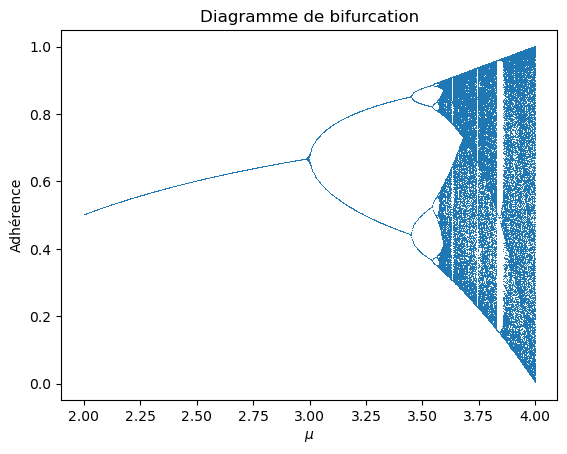

In [21]:
bifurcation()

In [23]:
def bifurcation_3d():
    adherence = []
    mus = []
    u0s = []
    nb_mu = 100
    n_skip = 30
    N = 100
    nb_u0 = 20
    for j in range(1,nb_u0): #  On fait varier la valeur de u0
        u0 = j/nb_u0 #u0
        for i in range(nb_mu):
            mu = 2+2*i/nb_mu
            un = u0
            #un = 0.9    
            for _ in range(n_skip):
                un = func(un,mu)
            for _ in range(N):
                un = func(un,mu)
                mus.append(mu)
                u0s.append(u0)
                adherence.append(un)

    # Création de la figure et de l'axe 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter3D(mus, u0s, adherence, c=adherence, s=5, cmap='viridis',marker=',');
    # ax.plot_trisurf(mus, u0s, adherence, cmap='viridis',edgecolor='none');
    ax.set_xlabel(r'$\mu$')
    ax.set_ylabel(r'$u_0$')
    ax.set_zlabel('Adhérence')
    plt.title('Diagramme de bifurcation 3D')
    ax.view_init(5, -85)
    plt.show()

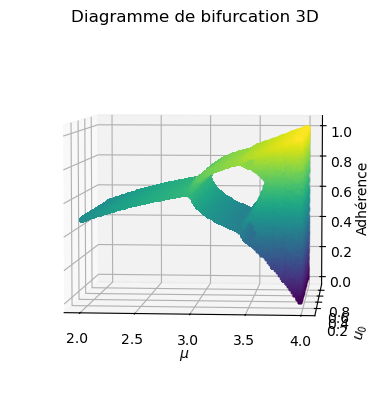

In [25]:
bifurcation_3d()